# Метод простой скользящий средний 

мес      1      2       3       4       5       6       7       8       9       10
знач    2,99    2,66    2,63    2,56    2,4     2,22    1,97    1,72    1,56    1,42

2.99,2.66,2.63,2.56,2.4,2.22,1.97,1.72,1.56,1.42
$$
m-нечет(период сглаживания)
$$
$$
y_i=(\sum_{k=i-m-1}^{i+(m-2)/2}y_k)
$$
$$
m-четное
$$
$$
\tilde{Y}_i=\frac{\frac{1}{2} y_i+\sum_{k=i-\frac{m}{2}+1}^{i+\frac{m}{2}-1}+\frac{1}{2}y_{i+\frac{m}{2}}}{m}
$$

[120.6, 120.6, 116.95, 117.9, 118.0, 115.35, 116.9, 117.0, 118.5, 119.25, 119.5, 117.95, 118.35, 116.45, 116.7, 117.4, 117.85, 119.15, 120.5, 120.5]


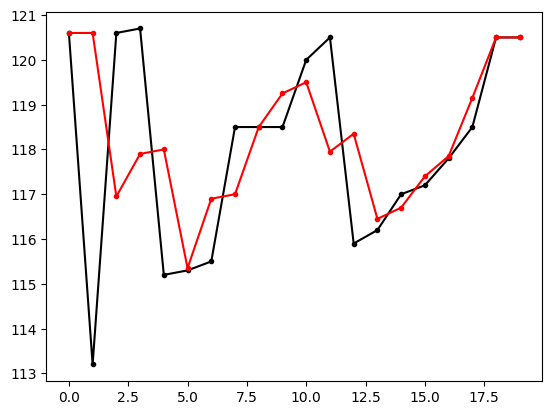

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def nechet(y: list, m: int):
    z = y.copy()
    for i in range((m-1)//2, len(y)-1-(m-1)//2):
        s = 0
        for k in range(i-(m-1)//2, i+(m-1)//2+1):
            s += z[k]
        z[i] = s/m
    return z


def chet(y: list, m: int):
    z = y.copy()
    for i in range(m//2, len(y)-1-m//2):
        s = 0
        s = y[i-m//2]+y[i+m//2]
        for k in range(i-m//2+1, i+m//2-1):
            s += y[k]
        z[i] = s/m
    return z


y = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
df = pd.DataFrame([y])
m = 2  # количество наблюдений
if (m % 2 != 0):
    z = nechet(y, m)
else:
    z = chet(y, m)
print(z)

plt.plot([i for i in range(len(y))], y, "k-",
         [i for i in range(len(y))], y, "k.")
plt.plot([i for i in range(len(z))], z, "r-",
         [i for i in range(len(z))], z, "r.")
plt.show()



# Метод экспонинцеального сглаживания
$$R_i=\alpha*y_i-(1-\alpha)*R_{i-1}$$

[120.6, 116.16, 118.824, 119.9496, 117.09984, 116.019936, 115.7079744, 117.38318976, 118.053275904, 118.3213103616, 119.32852414464, 120.031409657856, 117.55256386314241, 116.74102554525697, 116.8964102181028, 117.07856408724112, 117.51142563489644, 118.10457025395857, 119.54182810158343, 120.11673124063337]


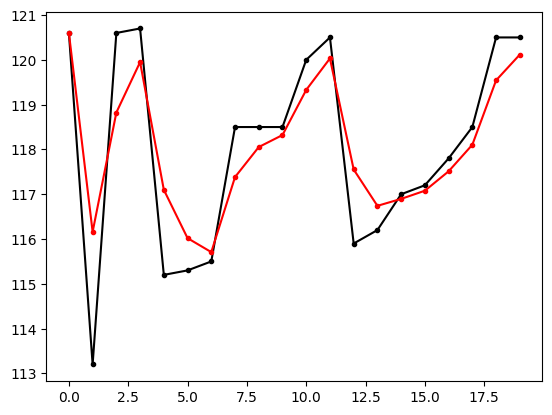

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def func1(y:list,alpha):
    s=y.copy()
    for i in range(1,len(y)):
        s[i]=alpha*y[i]+(1-alpha)*s[i-1]
    return s
y = [120.6, 113.2,  120.6, 120.7, 115.2, 115.3, 115.5,  118.5, 118.5,
     118.5, 120, 120.5, 115.9, 116.2, 117, 117.2, 117.8, 118.5, 120.5, 120.5]
alpha = 0.6 
s = func1(y,alpha)
print(s)
plt.plot([i for i in range(len(y))], y, "k-",
         [i for i in range(len(y))], y, "k.")
plt.plot([i for i in range(len(s))], s, "r-",
         [i for i in range(len(s))], s, "r.")
plt.show()



# "Прогнозирование на одно значение"
По факту смещение на одну вправо
$$
\tilde{Y}_{i+1}=\alpha\cdot Y_i + (1-\alpha)\cdot\tilde{Y}_i
$$

[2.99, 2.99, 2.7920000000000003, 2.6948, 2.6139200000000002, 2.4855679999999998, 2.3262272, 2.11249088, 1.8769963520000001, 1.6867985408, 1.52671941632]


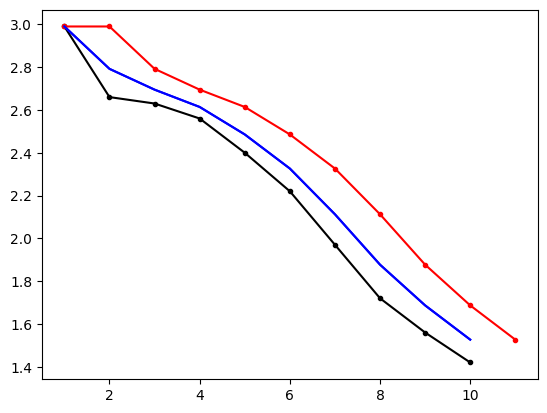

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import statistics as st


def func(y: list, alpha):
    s = y.copy()
    for i in range(0, len(y)-1):
        s[i+1] = alpha*y[i]+(1-alpha)*s[i]
    return s


def func1(y: list, alpha):
    s = y.copy()
    for i in range(1, len(y)):
        s[i] = alpha*y[i]+(1-alpha)*s[i-1]
    return s


y1 = [2.99, 2.66, 2.63, 2.56, 2.4, 2.22, 1.97, 1.72, 1.56, 1.42]
alpha = 0.6


y = [2.99, 2.66, 2.63, 2.56, 2.4, 2.22, 1.97, 1.72, 1.56, 1.42, None]
alpha = 0.6  # 0<=alpha<=1
s = func(y, alpha)
print(s)
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], y, "k-",
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], y, "k.")
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], s, "r-",
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], s, "r.")
s1 = func1(y1, alpha)

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], s1, "b-",
         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], s1, "b")


plt.show()
